In [8]:
import subprocess

# Compilar el código Java
compilation = subprocess.run(["javac", "Main.java"], capture_output=True, text=True)
respuestas={}
# Verificar si hubo errores en la compilación
if compilation.returncode != 0:
    print("Error en la compilación:")
    print(compilation.stderr)

else:
    for tamPagina in [512,1024,2048]:
        for numMarcos in [4,6]:
            for numeroDeEjecuciones in range(0,100):
                entrada=f"1\n{tamPagina}\ncaso2-parrotspeq.bmp\n3\n"
                execution = subprocess.run(
                    ["java", "Main"], 
                    input=entrada, 
                    capture_output=True, 
                    text=True, 
                    encoding="latin-1"  # Ajusta la codificación para evitar errores de lectura
                )
                entrada=f"2\n{numMarcos}\nreferencias.txt\n3\n"
                execution = subprocess.run(
                    ["java", "Main"], 
                    input=entrada, 
                    capture_output=True, 
                    text=True, 
                    encoding="latin-1"  # Ajusta la codificación para evitar errores de lectura
                )
                tuple_key=(tamPagina,numMarcos)
                if tuple_key not in respuestas:
                    dict_respuesta={}
                    dict_respuesta["hits"]=[]
                    dict_respuesta["fallos"]=[]
                    respuestas[tuple_key]=dict_respuesta

                lista_fallos=respuestas[tuple_key]["fallos"]
                lista_hits=respuestas[tuple_key]["hits"]
                respuesta=execution.stdout.split(",")
                lista_fallos.append(int(respuesta[0]))
                lista_hits.append(int(respuesta[1]))

In [9]:
respuestas

{(512,
  4): {'hits': [744673,
   745190,
   744132,
   744619,
   744280,
   744063,
   745047,
   745199,
   744716,
   744805,
   744144,
   744079,
   744082,
   745527,
   744952,
   744202,
   744253,
   744069,
   745149,
   745179,
   744623,
   744905,
   744323,
   744857,
   744258,
   744689,
   745895,
   745978,
   744809,
   744336,
   744540,
   745018,
   744883,
   744314,
   744806,
   744594,
   745318,
   745020,
   745265,
   745991,
   745090,
   744979,
   744641,
   744685,
   745253,
   745073,
   745003,
   745433,
   745007,
   744730,
   744804,
   744422,
   746067,
   744949,
   744913,
   744489,
   745648,
   744946,
   744656,
   744497,
   745667,
   744877,
   744724,
   744315,
   744450,
   745318,
   745487,
   744986,
   744479,
   745321,
   745339,
   744825,
   744627,
   745626,
   745565,
   744931,
   744561,
   744722,
   744945,
   745767,
   744684,
   745081,
   745394,
   745202,
   744660,
   744460,
   745874,
   745167,
   744738,
 

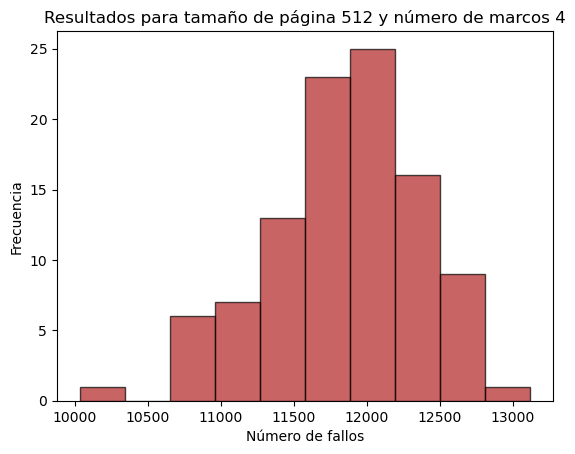

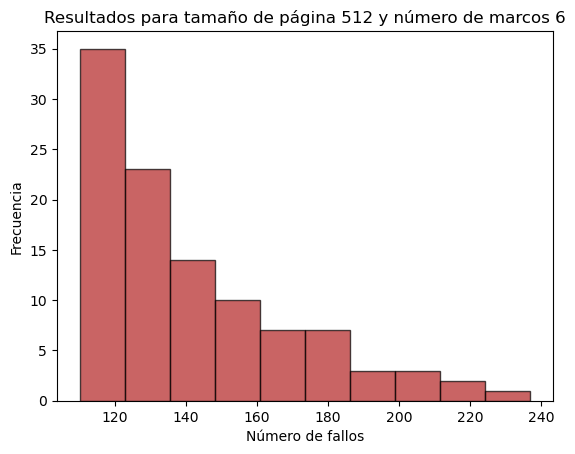

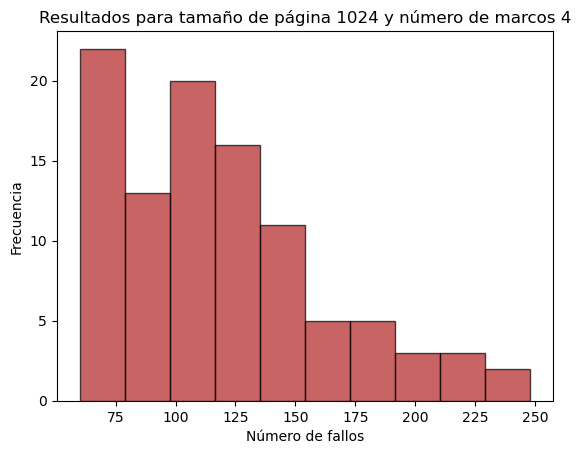

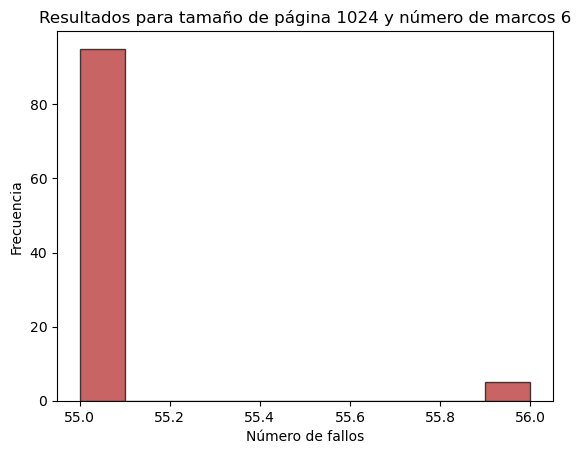

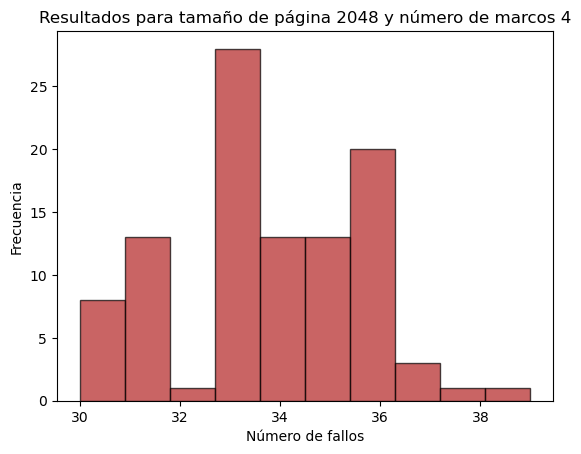

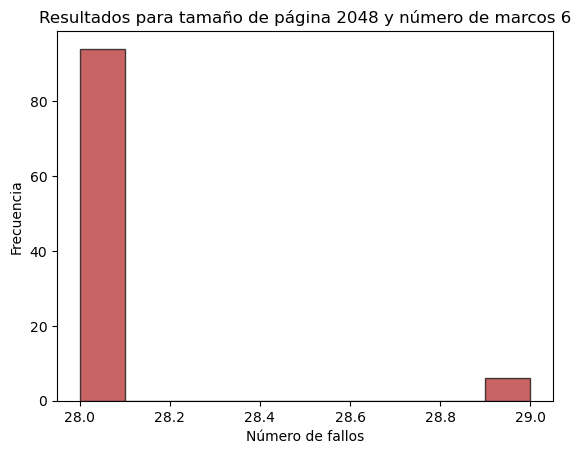

In [27]:
import matplotlib.pyplot as plt
for key in respuestas:
    plt.figure()
    plt.title(f"Resultados para tamaño de página {key[0]} y número de marcos {key[1]}")
    plt.xlabel("Número de fallos")
    plt.ylabel("Frecuencia")
    plt.hist(respuestas[key]["fallos"], color='firebrick', edgecolor='black', alpha=0.7)

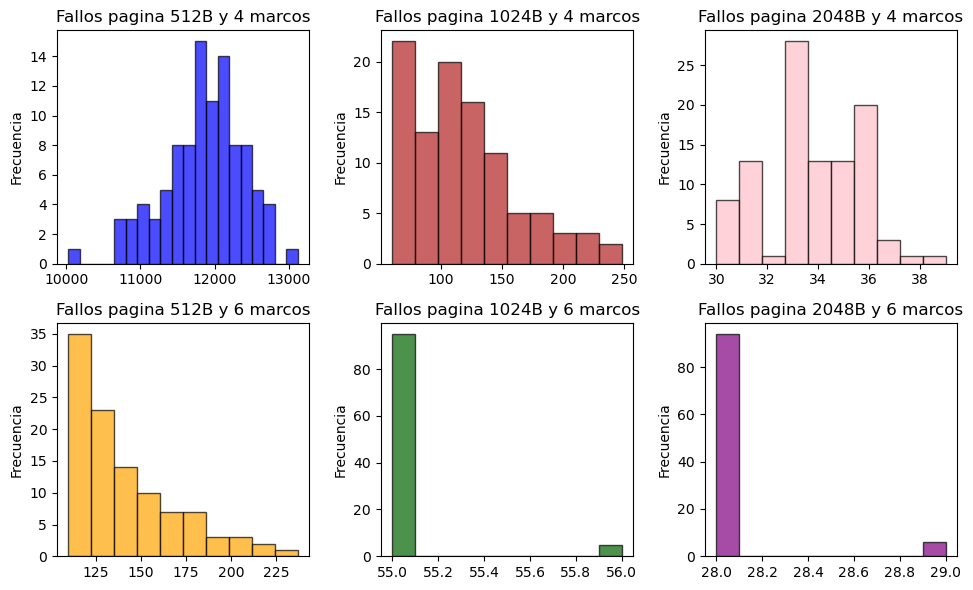

numpy.ndarray

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Crear figura y subgráficos (2 filas, 1 columna)
fig, axs = plt.subplots(2, 3, figsize=(10, 6))  # 2 filas, 1 columna

# Histograma 1
axs[0,0].hist(respuestas[(512,4)]["fallos"], bins=20, color='blue', edgecolor='black', alpha=0.7)
axs[0,0].set_title("Fallos pagina 512B y 4 marcos")
axs[0,0].set_ylabel("Frecuencia")

# Histograma 2 (con eje X logarítmico)
axs[1,0].hist(respuestas[(512,6)]["fallos"], color='orange', edgecolor='black', alpha=0.7)
axs[1,0].set_title("Fallos pagina 512B y 6 marcos")
axs[1,0].set_ylabel("Frecuencia")

axs[0,1].hist(respuestas[(1024,4)]["fallos"], color='firebrick', edgecolor='black', alpha=0.7)
axs[0,1].set_title("Fallos pagina 1024B y 4 marcos")
axs[0,1].set_ylabel("Frecuencia")

axs[1,1].hist(respuestas[(1024,6)]["fallos"], color='darkgreen', edgecolor='black', alpha=0.7)
axs[1,1].set_title("Fallos pagina 1024B y 6 marcos")
axs[1,1].set_ylabel("Frecuencia")

axs[0,2].hist(respuestas[(2048,4)]["fallos"], color='pink', edgecolor='black', alpha=0.7)
axs[0,2].set_title("Fallos pagina 2048B y 4 marcos")
axs[0,2].set_ylabel("Frecuencia")

axs[1,2].hist(respuestas[(2048,6)]["fallos"], color='purple', edgecolor='black', alpha=0.7)
axs[1,2].set_title("Fallos pagina 2048B y 6 marcos")
axs[1,2].set_ylabel("Frecuencia")

# Ajustar diseño
plt.tight_layout()

plt.show()

type(axs)

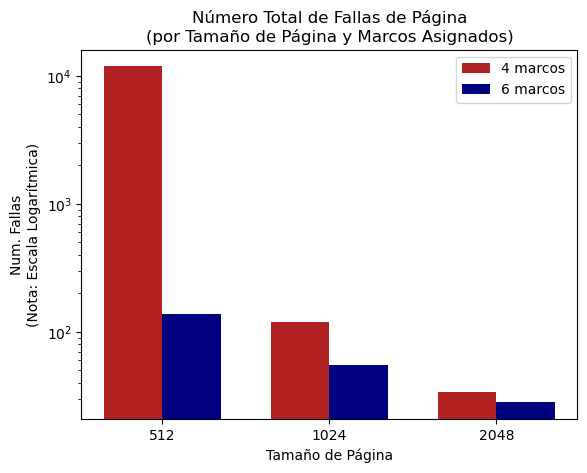

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Datos del gráfico
tamanio_pagina = ["512", "1024", "2048"]  # Etiquetas del eje X
fallas_4_marcos = [np.mean(respuestas[(512,4)]["fallos"]),np.mean(respuestas[(1024,4)]["fallos"]),np.mean(respuestas[(2048,4)]["fallos"])]  # Número de fallas con 4 marcos
fallas_6_marcos = [np.mean(respuestas[(512,6)]["fallos"]),np.mean(respuestas[(1024,6)]["fallos"]),np.mean(respuestas[(2048,6)]["fallos"])]  # Número de fallas con 6 marcos

# Posiciones en el eje X para las barras
x = np.arange(len(tamanio_pagina))  
width = 0.35  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar barras
bars1 = ax.bar(x - width/2, fallas_4_marcos, width, label="4 marcos", color="firebrick")
bars2 = ax.bar(x + width/2, fallas_6_marcos, width, label="6 marcos", color="navy")

# Configurar el eje Y en escala logarítmica
ax.set_yscale("log")

# Etiquetas y título
ax.set_xlabel("Tamaño de Página")
ax.set_ylabel("Num. Fallas\n(Nota: Escala Logarítmica)")
ax.set_title("Número Total de Fallas de Página\n(por Tamaño de Página y Marcos Asignados)")

# Configurar el eje X
ax.set_xticks(x)
ax.set_xticklabels(tamanio_pagina)

# Agregar leyenda
ax.legend()

# Mostrar gráfico
plt.show()


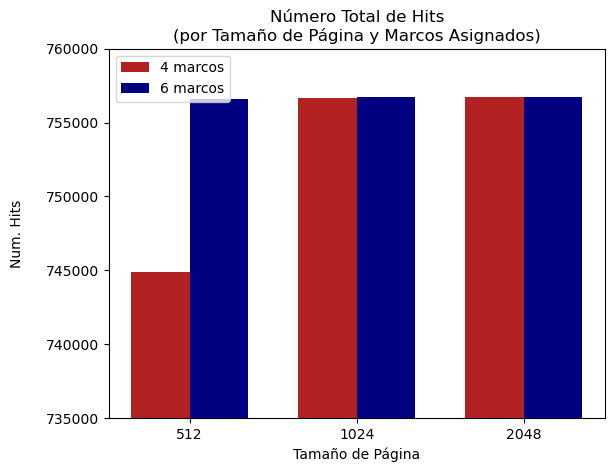

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Datos del gráfico
tamanio_pagina = ["512", "1024", "2048"]  # Etiquetas del eje X
fallas_4_marcos = [np.mean(respuestas[(512,4)]["hits"]),np.mean(respuestas[(1024,4)]["hits"]),np.mean(respuestas[(2048,4)]["hits"])]  # Número de fallas con 4 marcos
fallas_6_marcos = [np.mean(respuestas[(512,6)]["hits"]),np.mean(respuestas[(1024,6)]["hits"]),np.mean(respuestas[(2048,6)]["hits"])]  # Número de fallas con 6 marcos

# Posiciones en el eje X para las barras
x = np.arange(len(tamanio_pagina))  
width = 0.35  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar barras
bars1 = ax.bar(x - width/2, fallas_4_marcos, width, label="4 marcos", color="firebrick")
bars2 = ax.bar(x + width/2, fallas_6_marcos, width, label="6 marcos", color="navy")

# Configurar el eje Y en escala logarítmica
ax.set_ylim(735000,760000)

# Etiquetas y título
ax.set_xlabel("Tamaño de Página")
ax.set_ylabel("Num. Hits\n")
ax.set_title("Número Total de Hits\n(por Tamaño de Página y Marcos Asignados)")

# Configurar el eje X
ax.set_xticks(x)
ax.set_xticklabels(tamanio_pagina)

# Agregar leyenda
ax.legend()

# Mostrar gráfico
plt.show()


In [13]:
for key in respuestas:
    print(f"{key}= HITS: {np.mean(respuestas[key]['hits'])}, FALLAS: {np.mean(respuestas[key]['fallos'])}")


(512, 4)= HITS: 744918.66, FALLAS: 11837.34
(512, 6)= HITS: 756619.44, FALLAS: 136.56
(1024, 4)= HITS: 756636.75, FALLAS: 119.25
(1024, 6)= HITS: 756700.95, FALLAS: 55.05
(2048, 4)= HITS: 756722.35, FALLAS: 33.65
(2048, 6)= HITS: 756727.94, FALLAS: 28.06


In [ ]:
import subprocess

# Compilar el código Java
compilation = subprocess.run(["javac", "Main.java"], capture_output=True, text=True)
respuestas={}
# Verificar si hubo errores en la compilación
if compilation.returncode != 0:
    print("Error en la compilación:")
    print(compilation.stderr)

else:
    for tamPagina in [512]:
        for numMarcos in range(1,10):
            for numeroDeEjecuciones in range(0,20):
                entrada=f"1\n{tamPagina}\ncaso2-parrotspeq.bmp\n3\n"
                execution = subprocess.run(
                    ["java", "Main"], 
                    input=entrada, 
                    capture_output=True, 
                    text=True, 
                    encoding="latin-1"  # Ajusta la codificación para evitar errores de lectura
                )
                entrada=f"2\n{numMarcos}\nreferencias.txt\n3\n"
                execution = subprocess.run(
                    ["java", "Main"], 
                    input=entrada, 
                    capture_output=True, 
                    text=True, 
                    encoding="latin-1"  # Ajusta la codificación para evitar errores de lectura
                )
                tuple_key=(tamPagina,numMarcos)
                if tuple_key not in respuestas:
                    dict_respuesta={}
                    dict_respuesta["hits"]=[]
                    dict_respuesta["fallos"]=[]
                    respuestas[tuple_key]=dict_respuesta

                lista_fallos=respuestas[tuple_key]["fallos"]
                lista_hits=respuestas[tuple_key]["hits"]
                respuesta=execution.stdout.split(",")
                lista_fallos.append(int(respuesta[0]))
                lista_hits.append(int(respuesta[1]))

In [20]:
lista_plot=[]
for key in respuestas:
    lista_plot.append(np.mean(respuestas[key]['fallos']))


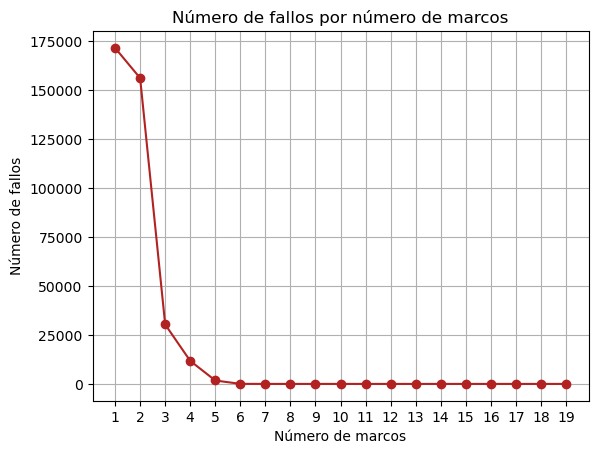

In [22]:
plt.plot(lista_plot, marker='o', linestyle='-', color='firebrick')
plt.title("Número de fallos por número de marcos")
plt.xlabel("Número de marcos")
plt.ylabel("Número de fallos")
plt.xticks(range(len(lista_plot)), range(1, len(lista_plot) + 1))
plt.grid(True)
plt.show()

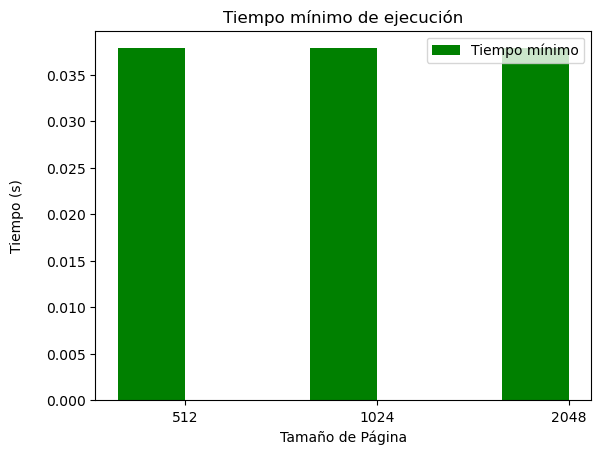

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# (512, 4)= HITS: 744918.66, FALLAS: 11837.34
# (512, 6)= HITS: 756619.44, FALLAS: 136.56
# (1024, 4)= HITS: 756636.75, FALLAS: 119.25
# (1024, 6)= HITS: 756700.95, FALLAS: 55.05
# (2048, 4)= HITS: 756722.35, FALLAS: 33.65
# (2048, 6)= HITS: 756727.94, FALLAS: 28.06

# Datos del gráfico
tamanio_pagina = ["512", "1024", "2048"]  # Etiquetas del eje X
tiempo_min=[756756*50e-6/1000]*3
tiempo_max=[756756*10/1000]*3
tiempo_4_marcos = [(744919*50e-6+11837*10)/1000,(756637*50e-6+119*10)/1000,(756722*50e-6+33*10)/1000]  # Número de fallas con 4 marcos
tiempo_6_marcos = [(756619*50e-6+137*10)/1000,(756701*50e-6+55*10)/1000,(756728*50e-6+28*10)/1000]  # Número de fallas con 6 marcos

# Posiciones en el eje X para las barras
x = np.arange(len(tamanio_pagina))  
width = 0.35  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar las 4 barras
bars3 = ax.bar(x - width/2, tiempo_min, width, label="Tiempo mínimo", color="green")
#bars1 = ax.bar(x - width/4, tiempo_4_marcos, width, label="4 marcos", color="firebrick")
#bars2 = ax.bar(x + width/4, tiempo_6_marcos, width, label="6 marcos", color="navy")
#bars4 = ax.bar(x + width/2, tiempo_max, width, label="Tiempo máximo", color="orange")
# Configurar el eje Y en escala logarítmica

# Etiquetas y título
ax.set_xlabel("Tamaño de Página")
ax.set_ylabel("Tiempo (s)\n")
ax.set_title("Tiempo mínimo de ejecución")
# Configurar el eje X
ax.set_xticks(x)
ax.set_xticklabels(tamanio_pagina)

# Agregar leyenda
ax.legend()

# Mostrar gráfico
plt.show()

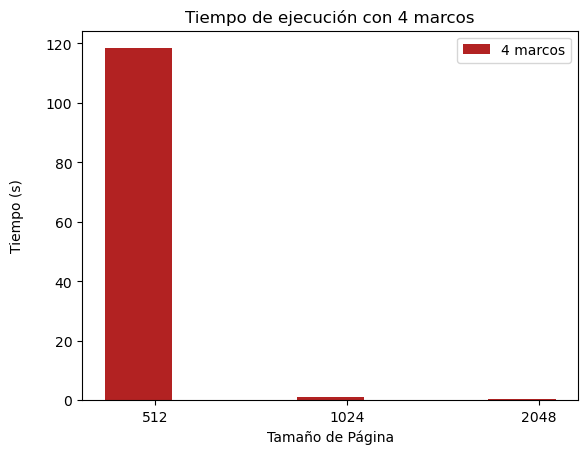

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# (512, 4)= HITS: 744918.66, FALLAS: 11837.34
# (512, 6)= HITS: 756619.44, FALLAS: 136.56
# (1024, 4)= HITS: 756636.75, FALLAS: 119.25
# (1024, 6)= HITS: 756700.95, FALLAS: 55.05
# (2048, 4)= HITS: 756722.35, FALLAS: 33.65
# (2048, 6)= HITS: 756727.94, FALLAS: 28.06

# Datos del gráfico
tamanio_pagina = ["512", "1024", "2048"]  # Etiquetas del eje X
tiempo_min=[756756*50e-6/1000]*3
tiempo_max=[756756*10/1000]*3
tiempo_4_marcos = [(744919*50e-6+11837*10)/1000,(756637*50e-6+119*10)/1000,(756722*50e-6+33*10)/1000]  # Número de fallas con 4 marcos
tiempo_6_marcos = [(756619*50e-6+137*10)/1000,(756701*50e-6+55*10)/1000,(756728*50e-6+28*10)/1000]  # Número de fallas con 6 marcos

# Posiciones en el eje X para las barras
x = np.arange(len(tamanio_pagina))  
width = 0.35  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar las 4 barras
#bars3 = ax.bar(x - width/2, tiempo_min, width, label="Tiempo mínimo", color="green")
bars1 = ax.bar(x - width/4, tiempo_4_marcos, width, label="4 marcos", color="firebrick")
#bars2 = ax.bar(x + width/4, tiempo_6_marcos, width, label="6 marcos", color="navy")
#bars4 = ax.bar(x + width/2, tiempo_max, width, label="Tiempo máximo", color="orange")
# Configurar el eje Y en escala logarítmica

# Etiquetas y título
ax.set_xlabel("Tamaño de Página")
ax.set_ylabel("Tiempo (s)\n")
ax.set_title("Tiempo de ejecución con 4 marcos")
# Configurar el eje X
ax.set_xticks(x)
ax.set_xticklabels(tamanio_pagina)

# Agregar leyenda
ax.legend()

# Mostrar gráfico
plt.show()

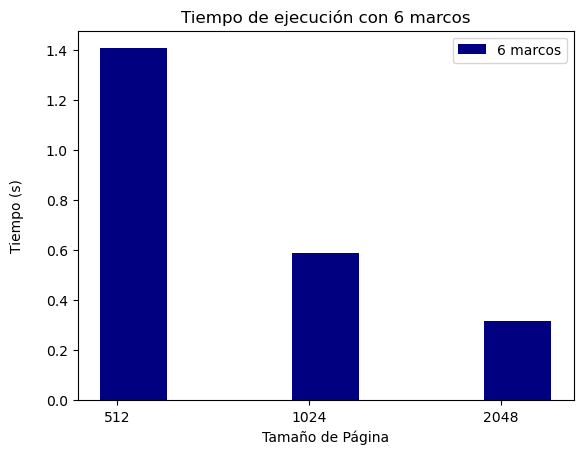

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# (512, 4)= HITS: 744918.66, FALLAS: 11837.34
# (512, 6)= HITS: 756619.44, FALLAS: 136.56
# (1024, 4)= HITS: 756636.75, FALLAS: 119.25
# (1024, 6)= HITS: 756700.95, FALLAS: 55.05
# (2048, 4)= HITS: 756722.35, FALLAS: 33.65
# (2048, 6)= HITS: 756727.94, FALLAS: 28.06

# Datos del gráfico
tamanio_pagina = ["512", "1024", "2048"]  # Etiquetas del eje X
tiempo_min=[756756*50e-6/1000]*3
tiempo_max=[756756*10/1000]*3
tiempo_4_marcos = [(744919*50e-6+11837*10)/1000,(756637*50e-6+119*10)/1000,(756722*50e-6+33*10)/1000]  # Número de fallas con 4 marcos
tiempo_6_marcos = [(756619*50e-6+137*10)/1000,(756701*50e-6+55*10)/1000,(756728*50e-6+28*10)/1000]  # Número de fallas con 6 marcos

# Posiciones en el eje X para las barras
x = np.arange(len(tamanio_pagina))  
width = 0.35  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar las 4 barras
#bars3 = ax.bar(x - width/2, tiempo_min, width, label="Tiempo mínimo", color="green")
#bars1 = ax.bar(x - width/4, tiempo_4_marcos, width, label="4 marcos", color="firebrick")
bars2 = ax.bar(x + width/4, tiempo_6_marcos, width, label="6 marcos", color="navy")
#bars4 = ax.bar(x + width/2, tiempo_max, width, label="Tiempo máximo", color="orange")
# Configurar el eje Y en escala logarítmica

# Etiquetas y título
ax.set_xlabel("Tamaño de Página")
ax.set_ylabel("Tiempo (s)\n")
ax.set_title("Tiempo de ejecución con 6 marcos")
# Configurar el eje X
ax.set_xticks(x)
ax.set_xticklabels(tamanio_pagina)

# Agregar leyenda
ax.legend()

# Mostrar gráfico
plt.show()

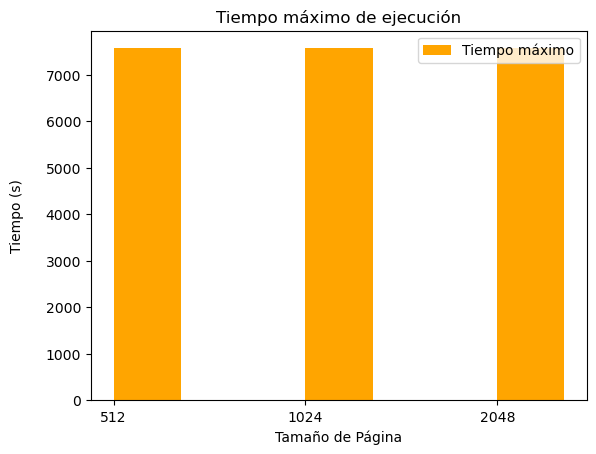

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# (512, 4)= HITS: 744918.66, FALLAS: 11837.34
# (512, 6)= HITS: 756619.44, FALLAS: 136.56
# (1024, 4)= HITS: 756636.75, FALLAS: 119.25
# (1024, 6)= HITS: 756700.95, FALLAS: 55.05
# (2048, 4)= HITS: 756722.35, FALLAS: 33.65
# (2048, 6)= HITS: 756727.94, FALLAS: 28.06

# Datos del gráfico
tamanio_pagina = ["512", "1024", "2048"]  # Etiquetas del eje X
tiempo_min=[756756*50e-6/1000]*3
tiempo_max=[756756*10/1000]*3
tiempo_4_marcos = [(744919*50e-6+11837*10)/1000,(756637*50e-6+119*10)/1000,(756722*50e-6+33*10)/1000]  # Número de fallas con 4 marcos
tiempo_6_marcos = [(756619*50e-6+137*10)/1000,(756701*50e-6+55*10)/1000,(756728*50e-6+28*10)/1000]  # Número de fallas con 6 marcos

# Posiciones en el eje X para las barras
x = np.arange(len(tamanio_pagina))  
width = 0.35  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar las 4 barras
#bars3 = ax.bar(x - width/2, tiempo_min, width, label="Tiempo mínimo", color="green")
#bars1 = ax.bar(x - width/4, tiempo_4_marcos, width, label="4 marcos", color="firebrick")
#bars2 = ax.bar(x + width/4, tiempo_6_marcos, width, label="6 marcos", color="navy")
bars4 = ax.bar(x + width/2, tiempo_max, width, label="Tiempo máximo", color="orange")
# Configurar el eje Y en escala logarítmica

# Etiquetas y título
ax.set_xlabel("Tamaño de Página")
ax.set_ylabel("Tiempo (s)\n")
ax.set_title("Tiempo máximo de ejecución")
# Configurar el eje X
ax.set_xticks(x)
ax.set_xticklabels(tamanio_pagina)

# Agregar leyenda
ax.legend()

# Mostrar gráfico
plt.show()